<a href="https://colab.research.google.com/github/Adevan-Neves/Exercicios-Linguagem-C/blob/master/lista1Prob%26Est.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from prettytable import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def freq_simples(lista,num=False):
    elementos=set(lista)
    freq={}
    for elem in elementos:
        if num:
            el=int(elem)
            freq[el]=lista.count(elem)
        else:
            freq[elem]=lista.count(elem)
    return freq
 
def mediana(lista):
    lista.sort()
    n=len(lista)
    a=0
    if n%2==0:
        i=n//2
        a=(lista[i]+lista[i-1])/2
    else:
        i=n//2
        a=lista[i]
    mediana=round(a,1)
    return mediana
    
    
def media(valor,f=[]):
    n=len(valor)
    if f:
        media=0
        soma=0
        i=0
        for c in range(n):
            soma+=(valor[i]+f[i])
            i+=1
        media=round(soma/n,2)
    else:
        media=0
        soma=0
        for elem in valor:
            soma+=elem
        media=round(soma/n,2)
    
    return media
 
def freq_perc(lfr,n):
    maior=round(lfr[0]/n,2)
    imaior=0
    lfrp=[]
    i=0
    for elem in lfr:
        frp=round(elem/n,2)
        lfrp.append(frp)
        if frp>=maior:
            maior=frp
            imaior=i
        
        i+=1
    if sum(lfrp)>1.00:
        novomaior=round(maior+(sum(lfrp)-1.00),2)
        lfrp.insert(imaior,novomaior)
        del(lfrp[imaior+1])
    elif sum(lfrp)<1.00:
        novomaior=round(maior+(1.00-sum(lfrp)),2)
        lfrp.insert(imaior,novomaior)
        del(lfrp[imaior+1])
        
    return lfrp
 
def intervalos(lista,n):
  '''Amplitude total da amostra'''
  h=max(lista)-min(lista)
  '''Numero de intervalos '''
  k=int(n**(1/2))
  '''Amplitude dos intervalos'''
  H=round(h/k,1)
  '''Primeiro extremo inferior do intervalo'''
  extInf=min(lista)
  dic={}
  for i in range(1,k+2):
    f=0
    listaIntervalo=[]
    for elem in lista:
      if extInf<=elem<(extInf+H):
        '''Compara intervalos espaçados igualmente'''
        f+=1
    faixa="%.2f |-- %.2f"%(extInf,extInf+H)
    dic[faixa]=f 
    extInf+=H 
  return dic
 
def frac(frequencias):
  fracu=[]
  acum=frequencias[0]
  n=len(frequencias)
  fracu.append(acum)
  for c in range(1,n):
    acum+=frequencias[c]
    fracu.append(acum)
  return fracu
 
def variancia(lista,media,n,lista_pesos=[]):
  if lista_pesos:
    listaElementos=[]
    variancia=0
    for i in range(len(lista)):
      variancia+=round(lista_pesos[i]*((lista[i]-media)**(2)),2)
    varianciafinal=round(variancia/(n-1),3)
  else:
    listaElementos=[]
    variancia=0
    for i in range(len(lista)):
      variancia+=round((lista[i]-media)**(2),2)
    varianciafinal=round(variancia/(n-1),2)
 
  return varianciafinal

In [3]:
tabela=pd.read_csv("/content/drive/MyDrive/Economia Exercícios/Banco-de-dados-para-1ª-Lista-de-Exercícios-de-Descritiva.csv")
tabela

,Id,Turma,Sexo,Idade,Alt,Peso,Irmãos,Fuma,Toler,Exerc,Cine,OpCine
0,1,A,F,17,1.60,60.5,2,NAO,P,0,1,B
1,2,A,F,18,1.69,55.0,1,NAO,M,0,1,B
2,3,A,M,18,1.85,72.8,2,NAO,P,5,2,M
3,4,A,M,25,1.85,80.9,2,NAO,P,5,2,B
4,5,A,F,19,1.58,55.0,1,NAO,M,2,2,B
5,6,A,M,19,1.76,60.0,3,NAO,M,2,1,B
6,7,A,F,20,1.60,58.0,1,NAO,P,3,1,B
7,8,A,F,18,1.64,47.0,1,SIM,I,2,2,M
8,9,A,F,18,1.62,57.8,3,NAO,M,3,3,M
9,10,A,F,17,1.64,58.0,2,NAO,M,2,2,M


In [4]:
tabela.head()

,Id,Turma,Sexo,Idade,Alt,Peso,Irmãos,Fuma,Toler,Exerc,Cine,OpCine
0,1,A,F,17,1.60,60.5,2,NAO,P,0,1,B
1,2,A,F,18,1.69,55.0,1,NAO,M,0,1,B
2,3,A,M,18,1.85,72.8,2,NAO,P,5,2,M
3,4,A,M,25,1.85,80.9,2,NAO,P,5,2,B
4,5,A,F,19,1.58,55.0,1,NAO,M,2,2,B


In [5]:
# 1 Lista de exercicios letra a classifique as variaveis
variaveisQualitativasNominais=["Turma","Sexo","Fuma"]
variaveisQualitativasOrdinais=["Toler","Opcine"]
variaveisQuantitativasDicretas=["Idade","Irmãos","Cine"]
variaveisQuantitativasContinuas=["Alt","Peso","Exerc"]

Vamos fazer as frequencias


In [6]:
# Construa a tabela de frequencias para cada variavel
# São 50 alunos nesta tabela
FreqTurmas=freq_simples(list(tabela['Turma']))
FreqTurmas=list(FreqTurmas.values())
FreqP=freq_perc(FreqTurmas,50)
FreqP=[a*100 for a in FreqP]
FreqAcum=frac(FreqTurmas)
TabelaTurmas=PrettyTable(["Nome da turma","Frequências Simples","Frequências Percentuais","Frequência Acumulada"])
nomes=["A","B"]
n=len(FreqP)
for c in range(n):
  TabelaTurmas.add_row([f"{nomes[c]}",f"{FreqTurmas[c]}",f"{FreqP[c]}",f"{FreqAcum[c]}"])
TabelaTurmas.horizontal_char="_"
TabelaTurmas.vertical_char=" "
TabelaTurmas.junction_char='.'
TabelaTurmas.hrules=ALL
TabelaTurmas.vrules=ALL
TabelaTurmas.add_row(["Total",f"{sum(FreqTurmas)}",f"{sum(FreqP)}","50"])
 
 
TabelaSexo=PrettyTable(["Sexo biológico",'Frequência Simples','Frequência Percentual',"Frequencia Acumulada"])
fsSexo=freq_simples(list(tabela["Sexo"]))
fsSexo=list(fsSexo.values())
fcSexo=freq_perc(fsSexo,50)
fcSexo=[a*100 for a in fcSexo]
faSexo=frac(fsSexo)
nome=["Masculino",'Feminino']
n=len(faSexo)
for c in range(n):
  TabelaSexo.add_row([f"{nome[c]}",f"{fsSexo[c]}",f"{fcSexo[c]}",f"{faSexo[c]}"])
TabelaSexo.horizontal_char="_"
TabelaSexo.vertical_char=" "
TabelaSexo.junction_char='.'
TabelaSexo.hrules=ALL
TabelaSexo.vrules=ALL
TabelaSexo.add_row(["Total",f"{sum(fsSexo)}",f"{sum(fcSexo)}","50"])
 
TabelaIdade=PrettyTable()
Titulos=["Idade (anos) ","Frequência simples ","Frequência Percentual","Frequência Acumulada"]
fsIdade=freq_simples(list(tabela["Idade"]),num=True)
fcIdade=freq_perc(list(fsIdade.values()),50)
fcIdade=[round(a*100,2) for a in fcIdade]
faIdade=frac(list(fsIdade.values()))
l=[list(fsIdade.keys()),list(fsIdade.values()),fcIdade,faIdade]
n=len(Titulos)
for i in range(n):
  TabelaIdade.add_column(f"{Titulos[i]}",l[i])
TabelaIdade.horizontal_char="_"
TabelaIdade.vertical_char=" "
TabelaIdade.junction_char='.'
TabelaIdade.hrules=ALL
TabelaIdade.vrules=ALL
# Erro aqui total nao tem consertar depois
TabelaIdade.add_row(["Total",f"{sum(list(fsIdade.values()))}",f"{sum(fcIdade)}","50"])
 
 
 
print("Tabela 1 - Turmas do curso de Engenharia na Universidade ABC no ano de 2018")
print(TabelaTurmas)
print("\n")
print("Tabela 2 - Sexo Biológico dos alunos do curso de Engenharia na Universidade ABC no ano de 2018")
print(TabelaSexo)
print("\n")
 
print("\n")
print("Tabela 3 - Idades dos alunos dos cursos de Engenharia da Universidade ABC no ano de 2018")
print(TabelaIdade)
print("\n")
 
Titulos2=["Intervalos Altura dos alunos (m)","Frequência simples ","Frequência Percentual","Frequência Acumulada"]
TabelaAltura=PrettyTable(Titulos2)
fsAltura=intervalos(list(tabela["Alt"]),50)
del fsAltura["1.85 |-- 1.95"]
del fsAltura["1.95 |-- 2.05"]
del fsAltura["2.05 |-- 2.15"]
del fsAltura["2.15 |-- 2.25"]
 
fcAltura=freq_perc(list(fsAltura.values()),50)
fcAltura=[a*100 for a in fcAltura]
faAltura=frac(list(fsAltura.values()))
#1.85 |-- 1.95
n=len(fcAltura)
for c in range(n):
  TabelaAltura.add_row([f"{list(fsAltura.keys())[c]}",f"{list(fsAltura.values())[c]}",f"{fcAltura[c]}",f"{faAltura[c]}"])
  
TabelaAltura.horizontal_char="_"
TabelaAltura.vertical_char=" "
TabelaAltura.junction_char='.'
TabelaAltura.hrules=ALL
TabelaAltura.vrules=ALL
TabelaAltura.add_row(["Total",sum(list(fsAltura.values())),sum(fcAltura),50]) 
 
 
Titulos3=['Intervalos de pesos (kg)',"Frequência simples ","Frequência Percentual","Frequência Acumulada"] 
TabelaPeso=PrettyTable(Titulos3)
fsPeso=intervalos(list(tabela['Peso']),50)
del fsPeso["95.10 |-- 102.40"]
fcPeso=freq_perc(list(fsPeso.values()),50)
fcPeso=[round(100*a,1) for a in fcPeso]
faPeso=frac(list(fsPeso.values()))
n=len(faPeso)
for c in range(n):
  TabelaPeso.add_row([f"{list(fsPeso.keys())[c]}",f"{list(fsPeso.values())[c]}",f"{fcPeso[c]}",f"{faPeso[c]}"])
TabelaPeso.add_row(["Total",sum(list(fsPeso.values())),sum(fcPeso),50])
TabelaPeso.horizontal_char="_"
TabelaPeso.vertical_char=" "
TabelaPeso.junction_char='.'
TabelaPeso.hrules=ALL
TabelaPeso.vrules=ALL
print("\n")
print("Tabela 4 -Alturas dos Alunos do curso de Engenharia na Universidade ABC no ano de 2018")
print(TabelaAltura)
print("\n")
print("Fonte : Questionario em formato excel")
print("Tabela 5 - Pesos do alunos do curso de Engenharia da Universidade ABC no ano de 2018")
print(TabelaPeso)
print("\nFonte : Questionário em formato Excel")

Tabela 1 - Turmas do curso de Engenharia na Universidade ABC no ano de 2018
._______________._____________________._________________________.______________________.
  Nome da turma   Frequências Simples   Frequências Percentuais   Frequência Acumulada  
._______________._____________________._________________________.______________________.
        A                  24                     48.0                     24           
._______________._____________________._________________________.______________________.
        B                  26                     52.0                     50           
._______________._____________________._________________________.______________________.
      Total                50                    100.0                     50           
._______________._____________________._________________________.______________________.


Tabela 2 - Sexo Biológico dos alunos do curso de Engenharia na Universidade ABC no ano de 2018
.________________.________

In [7]:
# Vou usar aqui as variáveis Irmãos para frente
TituloIrmao=["Irmãos","Frequência Simples","Frequência Percentual","Frequência Acumulada"]
TabelaIrmao=PrettyTable(TituloIrmao)
fsIrmao=freq_simples(list(tabela["Irmãos"]),num=True)
fcIrmao=freq_perc(list(fsIrmao.values()),50)
fcIrmao=[round(a*100,2) for a in fcIrmao]
faIrmao=frac(list(fsIrmao.values()))
 
n=len(faIrmao)
for c in range(n):
    TabelaIrmao.add_row([f"{list(fsIrmao.keys())[c]}",f"{list(fsIrmao.values())[c]}",f"{fcIrmao[c]}",f"{faIrmao[c]}"])
TabelaIrmao.add_row(["Total",sum(list(fsIrmao.values())),sum(fcIrmao),50])
TabelaIrmao.horizontal_char="_"
TabelaIrmao.vertical_char=" "
TabelaIrmao.junction_char='.'
TabelaIrmao.hrules=ALL
TabelaIrmao.vrules=ALL 
 
TituloFuma=["Você fuma ?","Frequência Simples","Frequência Percentual","Frequência Acumulada"]
TabelaFuma=PrettyTable (TituloFuma) 
fsFuma=freq_simples (list(tabela["Fuma"]))
fcFuma=freq_perc(list(fsFuma.values()),50)
fcFuma=[round(a*100,1) for a in fcFuma]
faFuma=frac(list(fsFuma.values()))
n=len(faFuma)
for c in range (n): 
    TabelaFuma.add_row([f"{list(fsFuma.keys())[c]}",f"{list(fsFuma.values())[c]}",f"{fcFuma[c]}",f"{faFuma[c]}"])
TabelaFuma.add_row(["Total",50,100.0,50])
TabelaFuma.horizontal_char="_"
TabelaFuma.vertical_char=" "
TabelaFuma.junction_char='.'
TabelaFuma.hrules=ALL
TabelaFuma.vrules=ALL
 
 
 
print("Tabela 6 - Irmãos dos alunos do curso de Engenharia Universidade ABC no ano de 2018")
 
print(TabelaIrmao)
 
print("\nTabela 7- Fumantes entre os alunos do curso de Engenharia Universidade ABC no ano de 2018")
print(TabelaFuma)
print("\n Fonte : Questionário em formato Excel")

Tabela 6 - Irmãos dos alunos do curso de Engenharia Universidade ABC no ano de 2018
.________.____________________._______________________.______________________.
  Irmãos   Frequência Simples   Frequência Percentual   Frequência Acumulada  
.________.____________________._______________________.______________________.
    1              28                    56.0                    28           
.________.____________________._______________________.______________________.
    2              14                    28.0                    42           
.________.____________________._______________________.______________________.
    3              6                     12.0                    48           
.________.____________________._______________________.______________________.
    4              1                     2.0                     49           
.________.____________________._______________________.______________________.
    7              1                     2.0   

In [8]:
 
TitulosToler=["Níveis de Tolerância","Frequência Simples","Frequência Percentual","Frequência Acumulada"]
TabelaToler=PrettyTable(TitulosToler)
fsToler=freq_simples(list(tabela["Toler"]))
fcToler=freq_perc(list(fsToler.values()),50)
fcToler=[round(a*100,1) for a in fcToler]
faToler=frac(list(fsToler.values()))
n=len(faToler)
nomesSER=["Incomoda Muito","Incomoda Pouco","Indiferente"]
for c in range(n):
  TabelaToler.add_row([f"{nomesSER[c]}",f"{list(fsToler.values())[c]}",f"{fcToler[c]}",f"{faToler[c]}"])
TabelaToler.add_row(["Total",50,100.0,50])
TabelaToler.horizontal_char="_"
TabelaToler.vertical_char=" "
TabelaToler.junction_char="."
TabelaToler.hrules=ALL
TabelaToler.vrules=ALL
print("Tabela 8 - Tolerância a cigarros dos alunos de Engenharia na Universidade ABC no ano de 2018")
print(TabelaToler)
print("\n Fonte : Questionário em formato Excel")

Tabela 8 - Tolerância a cigarros dos alunos de Engenharia na Universidade ABC no ano de 2018
.______________________.____________________._______________________.______________________.
  Níveis de Tolerância   Frequência Simples   Frequência Percentual   Frequência Acumulada  
.______________________.____________________._______________________.______________________.
     Incomoda Muito              21                    42.0                    21           
.______________________.____________________._______________________.______________________.
     Incomoda Pouco              19                    38.0                    40           
.______________________.____________________._______________________.______________________.
      Indiferente                10                    20.0                    50           
.______________________.____________________._______________________.______________________.
         Total                   50                   100.0           

In [9]:
tabela.head()

,Id,Turma,Sexo,Idade,Alt,Peso,Irmãos,Fuma,Toler,Exerc,Cine,OpCine
0,1,A,F,17,1.60,60.5,2,NAO,P,0,1,B
1,2,A,F,18,1.69,55.0,1,NAO,M,0,1,B
2,3,A,M,18,1.85,72.8,2,NAO,P,5,2,M
3,4,A,M,25,1.85,80.9,2,NAO,P,5,2,B
4,5,A,F,19,1.58,55.0,1,NAO,M,2,2,B


In [10]:
TituloExerc=["Horas de atividade física por semana",
"Frequência Simples","Frequência Percentual","Frequência Acumulada"]
TabelaExerc=PrettyTable(TituloExerc)
 
fsExerc=freq_simples(list(tabela["Exerc"]))
fcExerc=freq_perc(list(fsExerc.values()),50)
fcExerc=[round(100*a,1) for a in fcExerc]
faExerc=frac(list(fsExerc.values()))
n=len(faExerc)
for c in range (n):
    TabelaExerc.add_row([f"{list(fsExerc.keys())[c]}",f"{list(fsExerc.values())[c]}", f"{fcExerc[c]}",f"{faExerc[c]}"])
TabelaExerc.horizontal_char="_"
TabelaExerc.vertical_char=" "
TabelaExerc.vrules=ALL
TabelaExerc.hrules=ALL
TabelaExerc.junction_char="."
 
 
TituloCine=["Vezes que vai ao cinema por semana","Frequência Simples","Frequência Percentual","Frequência Acumulada"]
TabelaCine=PrettyTable (TituloCine)
fsCine=freq_simples(list(tabela["Cine"]))
fcCine=freq_perc(list(fsCine.values()),50)
fcCine=[round(100*a,1) for a in fcCine]
faCine=frac(list(fsCine.values()))
n=len(faCine)
for c in range (n):
    TabelaCine.add_row([f"{list(fsCine.keys())[c]}",f"{list(fsCine.values())[c]}",f"{fcCine[c]}",f"{faCine[c]}"])
TabelaCine.horizontal_char="_"
TabelaCine.vertical_char=" "
TabelaCine.vrules=ALL
TabelaCine.hrules=ALL
TabelaCine.junction_char="."
 
TituloOpCine=["Opinião do aluno","Frequência Simples","Frequência Percentual","Frequência Acumulada"]
TabelaOpCine=PrettyTable (TituloOpCine)
fsOpCine=freq_simples(list(tabela["OpCine"]))
fcOpCine=freq_perc(list(fsOpCine.values()),50)
fcOpCine=[round(100*a,1) for a in fcOpCine]
faOpCine=frac(list(fsOpCine.values()))
n=len(faOpCine)
opcinet=["Regular a boa","Muito boa"]
for c in range(n):
    TabelaOpCine.add_row([f"{opcinet[c]}",f"{list(fsOpCine.values())[c]}",f"{fcOpCine[c]}",f"{faOpCine[c]}"])
TabelaOpCine.horizontal_char="_"
TabelaOpCine.vertical_char=" "
TabelaOpCine.vrules=ALL
TabelaOpCine.hrules=ALL
TabelaOpCine.junction_char="."
 
 
 
print("Tabela 9-Tempo de atividade física semanal dos alunos do curso de Engenharia da Universidade ABC no ano de 2018")
print(TabelaExerc)
print("\n")
print("Tabela 10-Quantidade de idas ao cinema dos alunos de Engenharia Da Universidade ABC no ano de 2018\n")
print(TabelaCine)
print("\n Fonte : Questionário em formato Excel")
print("\n")
print("Tabela 11-Opinião dos alunos do curso de Engenharia da Universidade ABC no ano de 2018")
print(TabelaOpCine)
print("\nFonte : Questionário em formado Excel")

Tabela 9-Tempo de atividade física semanal dos alunos do curso de Engenharia da Universidade ABC no ano de 2018
.______________________________________.____________________._______________________.______________________.
  Horas de atividade física por semana   Frequência Simples   Frequência Percentual   Frequência Acumulada  
.______________________________________.____________________._______________________.______________________.
                   0                             8                     16.0                    8            
.______________________________________.____________________._______________________.______________________.
                   1                             3                     6.0                     11           
.______________________________________.____________________._______________________.______________________.
                   2                             8                     16.0                    19           
._______________

###Agora vamos construir os graficos de todas as 11 tabelas

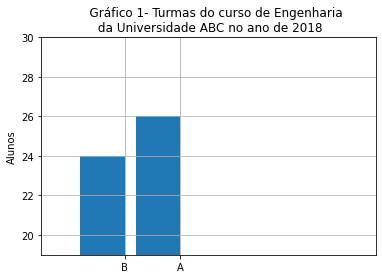

In [11]:
fsTurma=freq_simples(list(tabela["Turma"]))
nomesTurmas=list(fsTurma.keys())
alunos=list(fsTurma.values())
xs = [i + 0.1 for i, _ in enumerate(nomesTurmas)]
plt.bar(xs, alunos)
plt.ylabel("Alunos")
plt.title("    Gráfico 1- Turmas do curso de Engenharia\n da Universidade ABC no ano de 2018")
# nomeia o eixo x com nomes de filmes na barra central
plt.xticks([i + 0.5 for i, _ in enumerate(nomesTurmas)], nomesTurmas)
plt.axis([-1,5,19,30])
plt.grid()
plt.show()

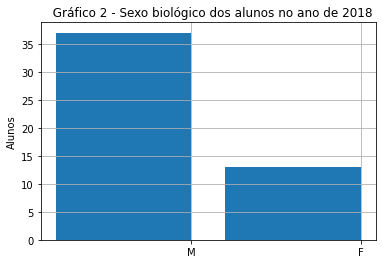

In [12]:
fsSexo=freq_simples(list(tabela["Sexo"]))
nomeSexo=["M","F"]
qtdSexo=[37,13]
 
 
# barras possuem o tamanho padrão de 0.8, então adicionaremos 0.1 às
# coordenadas à esquerda para que cada barra seja centralizada
xs = [i + 0.1 for i, _ in enumerate(nomeSexo)]
# as barras do gráfico com as coordenadas x à esquerda [xs], alturas [num_oscars]
plt.bar(xs,qtdSexo)
plt.ylabel("Alunos")
plt.title("  Gráfico 2 - Sexo biológico dos alunos no ano de 2018")
# nomeia o eixo x com nomes de filmes na barra central
plt.xticks([i + 0.5 for i, _ in enumerate(nomeSexo)], nomeSexo)
plt.grid()
plt.show()

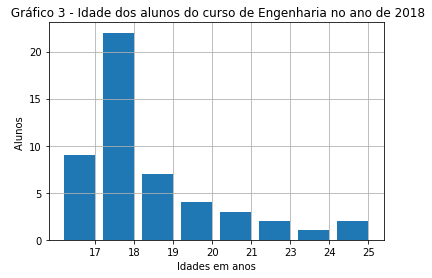

In [13]:
idades=list(fsIdade.keys())
alunosidade=list(fsIdade.values())
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# barras possuem o tamanho padrão de 0.8, então adicionaremos 0.1 às
# coordenadas à esquerda para que cada barra seja centralizada
xs = [i + 0.1 for i, _ in enumerate(idades)]
# as barras do gráfico com as coordenadas x à esquerda [xs], alturas [num_oscars]
plt.bar(xs, alunosidade)
plt.ylabel("Alunos ")
plt.xlabel("Idades em anos")
plt.title(" Gráfico 3 - Idade dos alunos do curso de Engenharia no ano de 2018")
# nomeia o eixo x com nomes de filmes na barra central
plt.xticks([i + 0.5 for i, _ in enumerate(idades)], idades)
plt.grid()
plt.show()

### A tabela 4 e 5 preciso de histogrmas, vou pular pra fzaer a 6 com irmaos

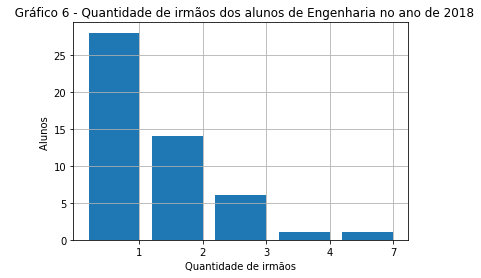

In [14]:
numIrmaos=list(fsIrmao.keys())
alunosIrmaos=list(fsIrmao.values())
 
 
xs = [i + 0.1 for i, _ in enumerate(numIrmaos)]
# as barras do gráfico com as coordenadas x à esquerda [xs], alturas [num_oscars]
plt.bar(xs, alunosIrmaos)
plt.ylabel("Alunos ")
plt.xlabel("Quantidade de irmãos")
plt.title("  Gráfico 6 - Quantidade de irmãos dos alunos de Engenharia no ano de 2018")
# nomeia o eixo x com nomes de filmes na barra central
plt.xticks([i + 0.5 for i, _ in enumerate(numIrmaos)], numIrmaos)
plt.grid()
plt.show()

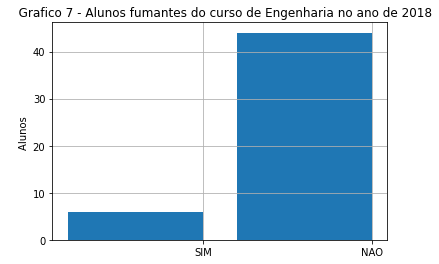

In [15]:
fuma=list(fsFuma.keys())
alunosfuma=list(fsFuma.values())
 
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# barras possuem o tamanho padrão de 0.8, então adicionaremos 0.1 às
# coordenadas à esquerda para que cada barra seja centralizada
xs = [i + 0.1 for i, _ in enumerate(fuma)]
# as barras do gráfico com as coordenadas x à esquerda [xs], alturas [num_oscars]
plt.bar(xs, alunosfuma)
plt.ylabel("Alunos ")
plt.title("   Grafico 7 - Alunos fumantes do curso de Engenharia no ano de 2018")
# nomeia o eixo x com nomes de filmes na barra central
plt.xticks([i + 0.5 for i, _ in enumerate(fuma)], fuma)
plt.grid()
plt.show()

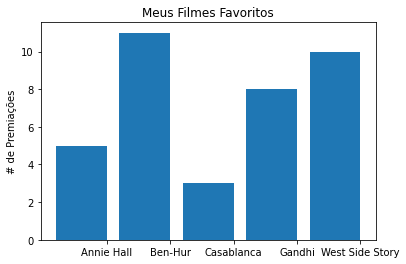

In [16]:
 
tolerFuma=list(fsToler.keys())
 
 
 
 
 
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# barras possuem o tamanho padrão de 0.8, então adicionaremos 0.1 às
# coordenadas à esquerda para que cada barra seja centralizada
xs = [i + 0.1 for i, _ in enumerate(movies)]
# as barras do gráfico com as coordenadas x à esquerda [xs], alturas [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# de Premiações")
plt.title("Meus Filmes Favoritos")
# nomeia o eixo x com nomes de filmes na barra central
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

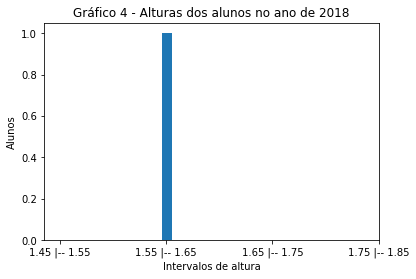

In [17]:
 
altura=list(fsAltura.keys())
qtdaltura=list(fsAltura.values())
 
 
 
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# barras possuem o tamanho padrão de 0.8, então adicionaremos 0.1 às
# coordenadas à esquerda para que cada barra seja centralizada
xs = [i + 0.01 for i, _ in enumerate(altura)]
# as barras do gráfico com as coordenadas x à esquerda [xs], alturas [num_oscars]
plt.hist(qtdaltura,xs,histtype="bar",rwidth=0.1)
plt.ylabel("Alunos")
plt.xlabel("Intervalos de altura")
plt.title("Gráfico 4 - Alturas dos alunos no ano de 2018")
# nomeia o eixo x com nomes de filmes na barra central
plt.xticks([i + 0.5 for i, _ in enumerate(altura)], altura)
plt.show()

In [18]:
# questao 2
# Justifivativa da questao 2
lista=[32,3,20,1,7,3,1,5,8,4,5,17,17,3]
m=mediana(lista)
print(m)
med=media(lista)
qtdHoras=[0,1,3,3.5,4,5,6,7,8,9,10,11,12,13]
med=media(lista,qtdHoras)
print(med)

5.0
15.61
